In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
sns.set()

In [2]:
data =pd.read_csv('../input/energy-consumption/household_power_consumption.txt', sep=';',na_values='?',dtype= float,
                  header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, 
                 index_col='datetime')
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
data.info()

In [ ]:
data.columns

In [3]:
Conv = data.values.astype('float32')
data['energy_consumed_other'] = (Conv[:, 0] * 1000/60) - (Conv[:, 4] + Conv[:, 5] + Conv[:, 6])

In [4]:
data.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666


In [5]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
energy_consumed_other    25979
dtype: int64

In [6]:
df = data.fillna(data.mean())

In [ ]:
# df = data.interpolate(method='linear', limit_direction='forward')

In [8]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
energy_consumed_other    0
dtype: int64

In [ ]:
# plt.figure(figsize=(15, 8))
# for i in range(len(df.columns)):
#     plt.subplot(len(df.columns), 1, i+1)
#     name = df.columns[i]
#     plt.plot(df[name])
#     plt.title(name, y=0)
# plt.show()

In [ ]:
# plt.figure(figsize=(15,8))
# df_daily = df.resample('D').mean()
# plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker='*')
# plt.show()

In [7]:
daily_groups = df.resample('D')
daily_data = daily_groups.sum()
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933594
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.667969
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433594
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900391
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800781


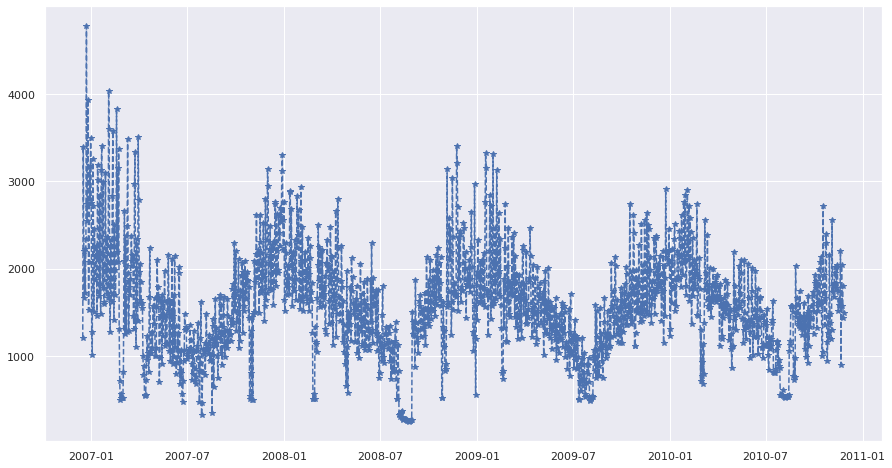

In [9]:
plt.figure(figsize=(15,8))
# df_quarterly = df.resample('3M').mean()
plt.plot(daily_data.index, daily_data.Global_active_power, '--', marker='*')
plt.show()

In [10]:
daily_data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other
Global_active_power,1.000000,0.041098,0.062472,0.999182,0.545338,0.481370,0.732613,0.887528
Global_reactive_power,0.041098,1.000000,0.050499,0.062937,0.319394,0.182199,0.035568,-0.099979
Voltage,0.062472,0.050499,1.000000,0.052267,-0.003968,-0.013712,0.095774,0.050254
Global_intensity,0.999182,0.062937,0.052267,1.000000,0.557974,0.490772,0.724146,0.884771
Sub_metering_1,0.545338,0.319394,-0.003968,0.557974,1.000000,0.251585,0.308917,0.359245
Sub_metering_2,0.481370,0.182199,-0.013712,0.490772,0.251585,1.000000,0.198360,0.259284
Sub_metering_3,0.732613,0.035568,0.095774,0.724146,0.308917,0.198360,1.000000,0.447594
energy_consumed_other,0.887528,-0.099979,0.050254,0.884771,0.359245,0.259284,0.447594,1.000000


In [11]:
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
energy_consumed_other,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


In [13]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
energy_consumed_other,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


In [12]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['Voltage'], df['Global_intensity'])

print(corr)

-0.41136307176847076


In [14]:
daily_data.shape

(1442, 8)

In [15]:
train = daily_data.iloc[:-365, :]
test = daily_data.iloc[-365:, :]

In [16]:
print(train.shape)
print(test.shape)

(1077, 8)
(365, 8)


In [18]:
first = train.copy()
first.reset_index()
first['dt'] = first.index
first.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other,dt
datetime,,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933594,2006-12-16
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.667969,2006-12-17
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433594,2006-12-18
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900391,2006-12-19
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800781,2006-12-20


In [48]:
sec = test.copy()

In [49]:
trial = sec[['Global_active_power']]

In [50]:
trial = trial.reset_index()

In [51]:
trial.head()

,datetime,Global_active_power
0,2009-11-27,1380.026
1,2009-11-28,1858.950
2,2009-11-29,1650.962
3,2009-11-30,1745.190
4,2009-12-01,1756.378


In [52]:
fin = trial.rename(columns={'datetime':'ds', 'Global_active_power':'y'})

In [33]:
my = first[['Global_active_power']]

In [34]:
my = my.reset_index()

In [35]:
my.head()

,datetime,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [36]:
tr = my.rename(columns={'datetime':'ds', 'Global_active_power':'y'})

In [37]:
tr.head()


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [57]:
model2 = Prophet()
model2.fit(tr)

In [58]:
tab = model2.predict(fin)
tab.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1582.602983,1528.727797,2666.615295,1582.602983,1582.602983,518.878164,518.878164,518.878164,-64.106330,-64.106330,-64.106330,582.984494,582.984494,582.984494,0.0,0.0,0.0,2101.481147
1,2009-11-28,1582.737295,1867.934089,2955.104072,1582.737295,1582.737295,822.085199,822.085199,822.085199,245.779609,245.779609,245.779609,576.305590,576.305590,576.305590,0.0,0.0,0.0,2404.822494
2,2009-11-29,1582.871607,1816.568884,2937.979982,1582.871607,1582.871607,796.132932,796.132932,796.132932,228.485697,228.485697,228.485697,567.647235,567.647235,567.647235,0.0,0.0,0.0,2379.004539
3,2009-11-30,1583.005919,1430.535924,2524.908216,1583.005919,1583.005919,396.256682,396.256682,396.256682,-161.258234,-161.258234,-161.258234,557.514916,557.514916,557.514916,0.0,0.0,0.0,1979.262602
4,2009-12-01,1583.140231,1585.540291,2651.177508,1583.140231,1583.140231,517.104170,517.104170,517.104170,-29.330130,-29.330130,-29.330130,546.434300,546.434300,546.434300,0.0,0.0,0.0,2100.244401


In [59]:
tab.shape

(365, 19)

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (/opt/conda/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [60]:
y_true, y_pred = np.array(fin['y']), np.array(tab['yhat'])
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mape)

20.88498509004629


In [61]:
rmse = np.sqrt(mean_squared_error(fin['y'], tab['yhat']))
print(rmse)

374.9533926990719


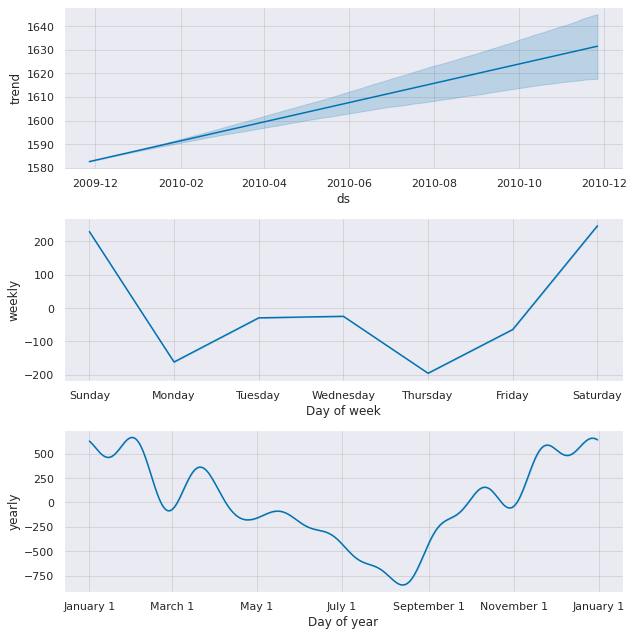

In [62]:
model2.plot_components(tab)
plt.show()

In [63]:
sec.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other
datetime,,,,,,,,
2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0,11005.433594
2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0,13047.500000
2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0,15554.033203
2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0,15606.500000
2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0,18097.966797


In [64]:
first.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumed_other,dt
datetime,,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933594,2006-12-16
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.667969,2006-12-17
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433594,2006-12-18
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900391,2006-12-19
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800781,2006-12-20


In [75]:
mul_tr = first[['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 
                'Sub_metering_2', 'Sub_metering_3']]
mul_te = sec[['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 
                'Sub_metering_2', 'Sub_metering_3']]

In [76]:
mul_tr = mul_tr.reset_index()
mul_te = mul_te.reset_index()

In [77]:
mul_tr.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [78]:
mul_tr.columns

Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [79]:
mul_tr = mul_tr.rename(columns={'datetime':'ds', 'Global_active_power':'y'})
mul_te = mul_te.rename(columns={'datetime':'ds', 'Global_active_power':'y'})

In [80]:
mul_tr.head()

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [81]:
m = Prophet()
m.add_regressor('Global_reactive_power')
m.add_regressor('Voltage')
m.add_regressor('Global_intensity')
m.add_regressor('Sub_metering_1')
m.add_regressor('Sub_metering_2')
m.add_regressor('Sub_metering_3')
m.fit(mul_tr)

In [82]:
fut = m.predict(mul_te)
fut.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Global_intensity,Global_intensity_lower,Global_intensity_upper,Global_reactive_power,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1595.458562,1364.130265,1397.029145,1595.458562,1595.458562,-232.330515,-232.330515,-232.330515,7.541469,...,-0.116727,-0.116727,-0.116727,2.962871,2.962871,2.962871,0.0,0.0,0.0,1381.013965
1,2009-11-28,1595.579416,1846.546251,1877.160158,1595.579416,1595.579416,263.408691,263.408691,263.408691,-8.886660,...,1.411460,1.411460,1.411460,3.295588,3.295588,3.295588,0.0,0.0,0.0,1861.835909
2,2009-11-29,1595.700269,1628.095209,1662.235400,1595.700269,1595.700269,47.463854,47.463854,47.463854,-2.797454,...,0.169053,0.169053,0.169053,3.664241,3.664241,3.664241,0.0,0.0,0.0,1644.151802
3,2009-11-30,1595.821122,1726.499298,1759.634477,1595.821122,1595.821122,131.754767,131.754767,131.754767,3.917748,...,-0.337487,-0.337487,-0.337487,4.073513,4.073513,4.073513,0.0,0.0,0.0,1742.715656
4,2009-12-01,1595.941976,1747.630543,1778.538422,1595.941976,1595.941976,150.957275,150.957275,150.957275,5.968992,...,-1.671647,-1.671647,-1.671647,4.527257,4.527257,4.527257,0.0,0.0,0.0,1762.465224


In [83]:
y_true, y_pred = np.array(mul_te['y']), np.array(fut['yhat'])
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mape)

2.6261601998681954


In [84]:
rmse = np.sqrt(mean_squared_error(mul_te['y'], fut['yhat']))
print(rmse)

39.134901085290956


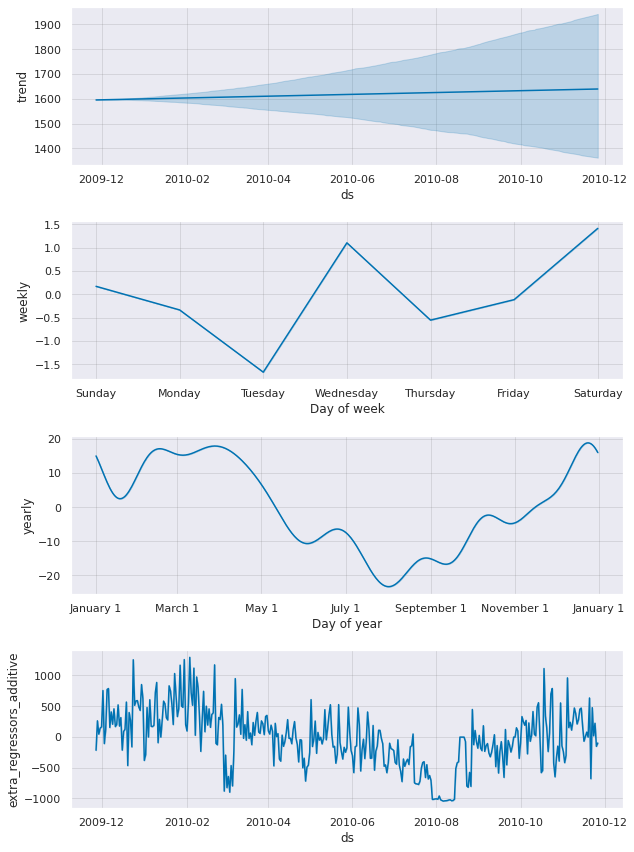

In [85]:
m.plot_components(fut)
plt.show()